#### Importing data

In [13]:
import pandas

board_games = pandas.read_csv("board_games.csv")
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games["users_rated"] > 0]

board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


#### Checking distribution of average ratings.

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

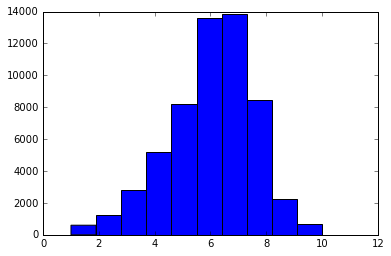

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(board_games["average_rating"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f4d808564e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4d80786be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d8078dd68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d8078d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4d8077db70>,
  <matplotlib.lines.Line2D at 0x7f4d8077dcc0>]}

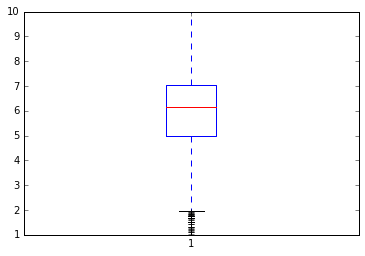

In [6]:
plt.boxplot(board_games['average_rating'])

In [7]:
print(board_games['average_rating'].std())
print(board_games['average_rating'].mean())

1.57855225734
6.01591084856


### Error metric
#### In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

#### Using KMeans clustering to see pattern in the average rating.

In [15]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric = board_games[cols]

clus.fit(numeric)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [16]:
labels = clus.labels_

In [17]:
import numpy
game_mean = numeric.apply(numpy.mean, axis=1)
game_std = numeric.apply(numpy.std, axis=1)

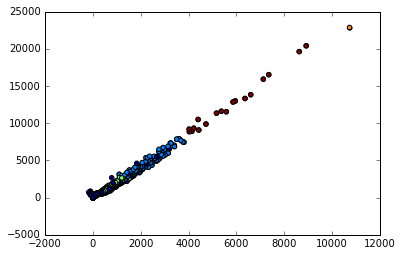

In [18]:
plt.scatter(x=game_mean, y=game_std, c=labels)

### Game Clusters
#### It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players.

#### Finding correlations of columns with the average_rating column.

In [21]:
correlations = numeric.corr()

correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

### Correlations
#### The yearvpublished column is surprisingly highly correlated with average_rating, showing that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated. The more "weighty" a game is (average_weight is high), the more highly it tends to be rated.

#### Using Linear Regression Model to predict the average_rating column.

In [23]:
from sklearn.linear_model import LinearRegression

# Initialising Linear Regression
reg = LinearRegression()
# Removing unnecessary columns
cols.remove("average_rating")
cols.remove("bayes_average_rating")
# Fitting the data on the algorithm
reg.fit(board_games[cols], board_games["average_rating"])
# Making the prediction
predictions = reg.predict(board_games[cols])
#Calculating the error metric i.e. mean squared error
numpy.mean((predictions - board_games["average_rating"]) ** 2)

2.0933969758339361

### Game clusters
#### The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. We'll need to dig more into which games were scored well, and which ones weren't.